In [ ]:
Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.


1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

1.2  Do you think scaling is necessary for clustering in this case? Justify

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

Dataset for Problem 1: bank_marketing_part1_Data.csv

Data Dictionary for Market Segmentation:

spending: Amount spent by the customer per month (in 1000s)
advance_payments: Amount paid by the customer in advance by cash (in 100s)
probability_of_full_payment: Probability of payment done in full by the customer to the bank
current_balance: Balance amount left in the account to make purchases (in 1000s)
credit_limit: Limit of the amount in credit card (10000s)
min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

In [21]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [118]:
df = pd.read_csv("bank_marketing_part1_Data.csv")
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [116]:
df.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans4,Clus_kmeans3
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,1,1
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795,2,2
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,1,1
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443,2,2
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879,2,2


In [117]:
df.shape()

TypeError: 'tuple' object is not callable

In [23]:
df.isna().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [24]:
print('The number of rows of the dataframe is',df.shape[0],'.')

print('The number of columns of the dataframe is',df.shape[1],'.')

The number of rows of the dataframe is 210 .
The number of columns of the dataframe is 7 .


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [26]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [27]:
df.corr()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


In [28]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


In [30]:
UNIVARIANT ANALYSIS.Looking for any outliers and checking the histogram to measure the skewness of columns.

SyntaxError: invalid syntax (<ipython-input-30-0412f26088ec>, line 1)

In [31]:
num = []
cat = [] 
for i in df.columns:
    if df[i].dtypes != 'int64'and df[i].dtypes != 'float64':
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

[]
['spending', 'advance_payments', 'probability_of_full_payment', 'current_balance', 'credit_limit', 'min_payment_amt', 'max_spent_in_single_shopping']


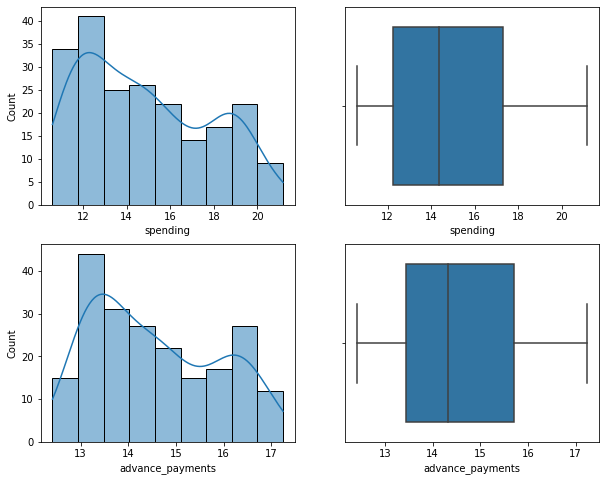

In [32]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df['spending'], kde=True, ax=axes[0][0])
sns.boxplot(x='spending', data=df, ax=axes[0][1])
sns.histplot(df['advance_payments'] , kde=True, ax=axes[1][0])
sns.boxplot(x='advance_payments', data=df , ax=axes[1][1])
plt.show()

In [33]:
stats.skew(df.spending)

0.39702715402072153

In [34]:
stats.skew(df.advance_payments)

0.38380604212562563

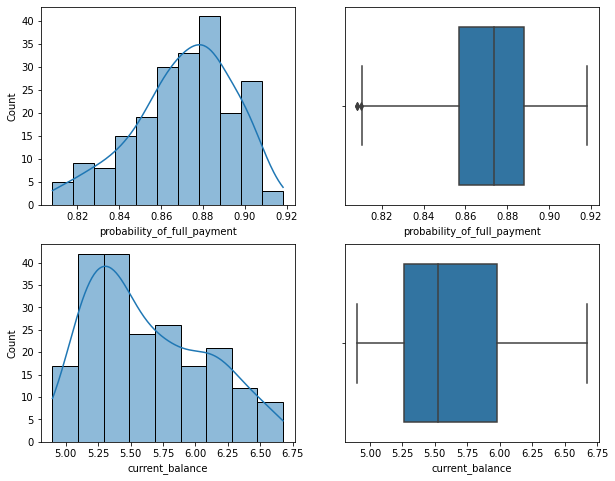

In [16]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df['probability_of_full_payment'], kde=True, ax=axes[0][0])
sns.boxplot(x='probability_of_full_payment', data=df, ax=axes[0][1])
sns.histplot(df['current_balance'] , kde=True, ax=axes[1][0])
sns.boxplot(x='current_balance', data=df , ax=axes[1][1])
plt.show()

In [35]:
stats.skew(df.probability_of_full_payment)

-0.5341035521949098

In [36]:
stats.skew(df.current_balance)

0.5217206481959235

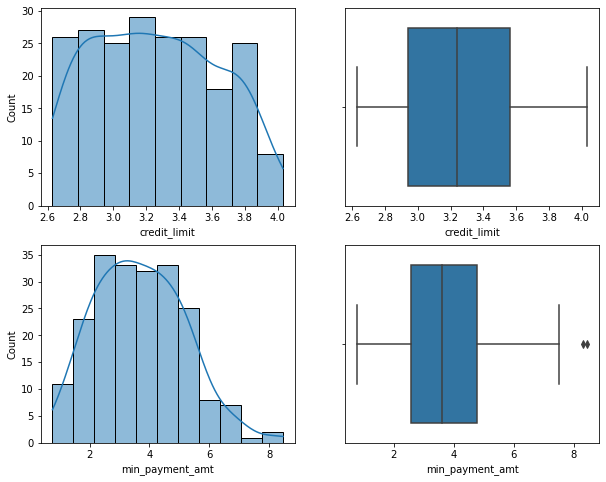

In [17]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df['credit_limit'], kde=True, ax=axes[0][0])
sns.boxplot(x='credit_limit', data=df, ax=axes[0][1])
sns.histplot(df['min_payment_amt'] , kde=True, ax=axes[1][0])
sns.boxplot(x='min_payment_amt', data=df , ax=axes[1][1])
plt.show()

In [37]:
stats.skew(df.credit_limit)

0.13341648969738135

In [38]:
stats.skew(df.min_payment_amt)

0.3987925792256687

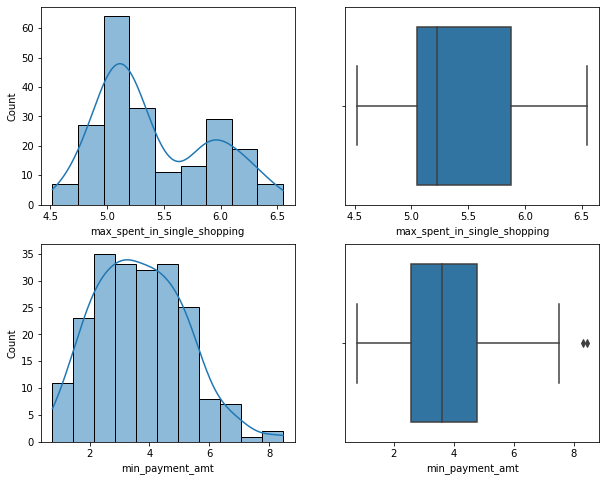

In [18]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df['max_spent_in_single_shopping'], kde=True, ax=axes[0][0])
sns.boxplot(x='max_spent_in_single_shopping', data=df, ax=axes[0][1])
sns.histplot(df['min_payment_amt'] , kde=True, ax=axes[1][0])
sns.boxplot(x='min_payment_amt', data=df , ax=axes[1][1])
plt.show()

In [39]:
stats.skew(df.max_spent_in_single_shopping)

0.5578758322317954

In [ ]:
BIVARIANT ANALYSIS

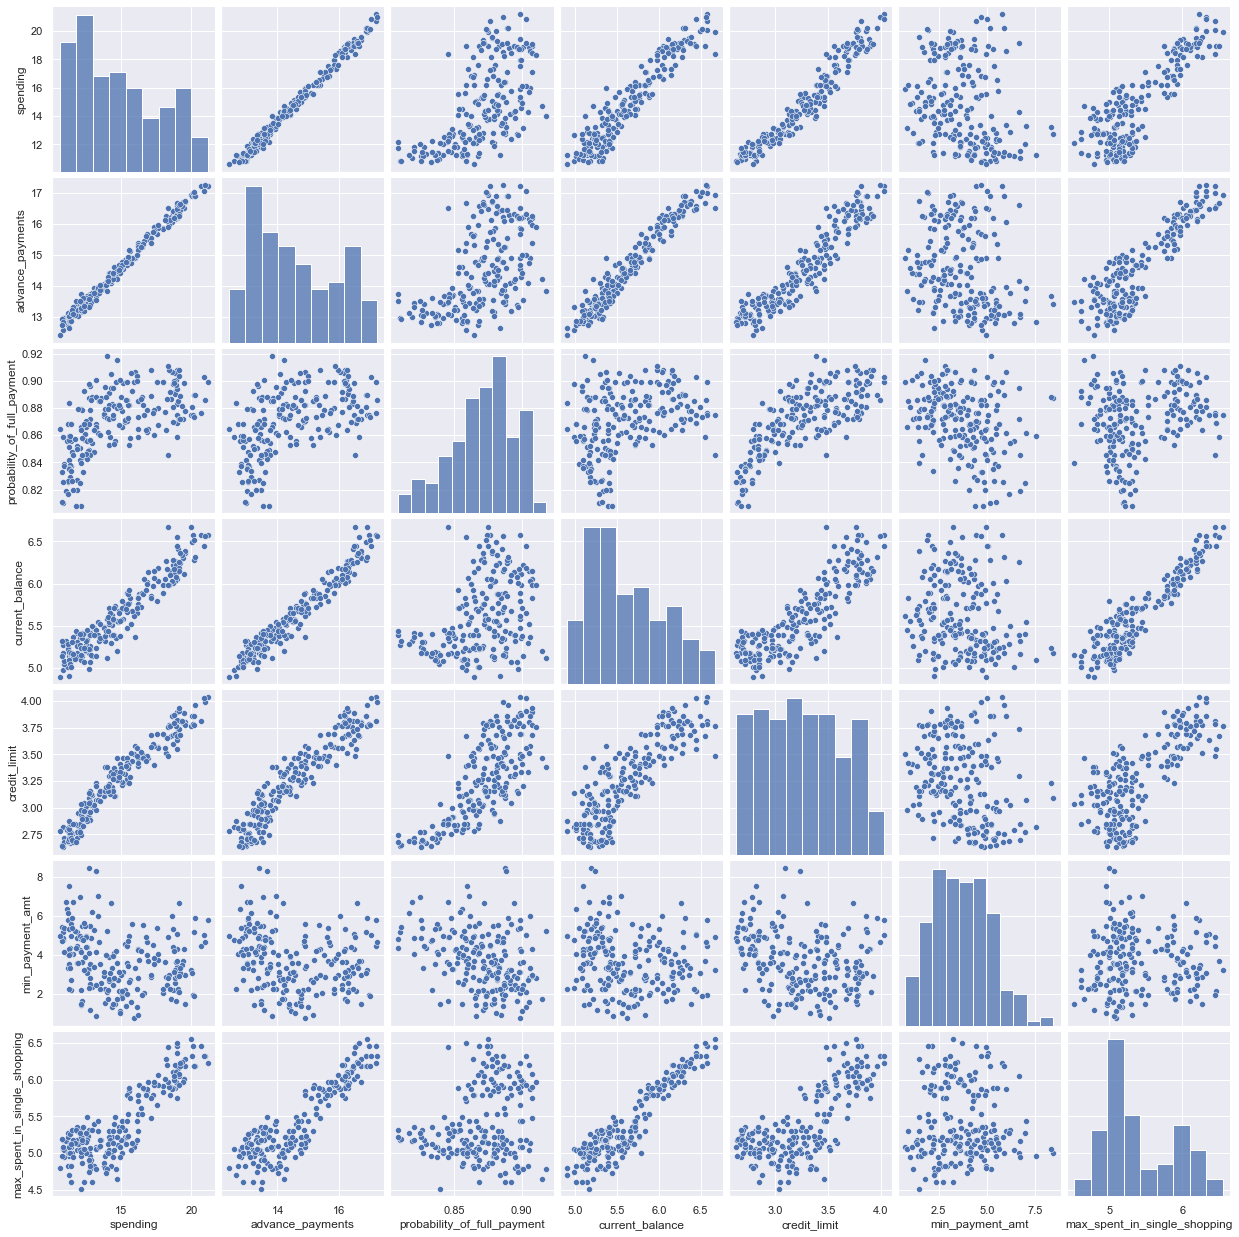

In [41]:
sns.set()
sns.pairplot(df)
plt.show()

In [ ]:
1)the main diagonal plot is histogram for each of the attributes.(univariant analysis)
2)we can see the various positive correlation 

In [ ]:
Check the correlation

In [42]:
corr = df.corr()
corr

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


<AxesSubplot:>

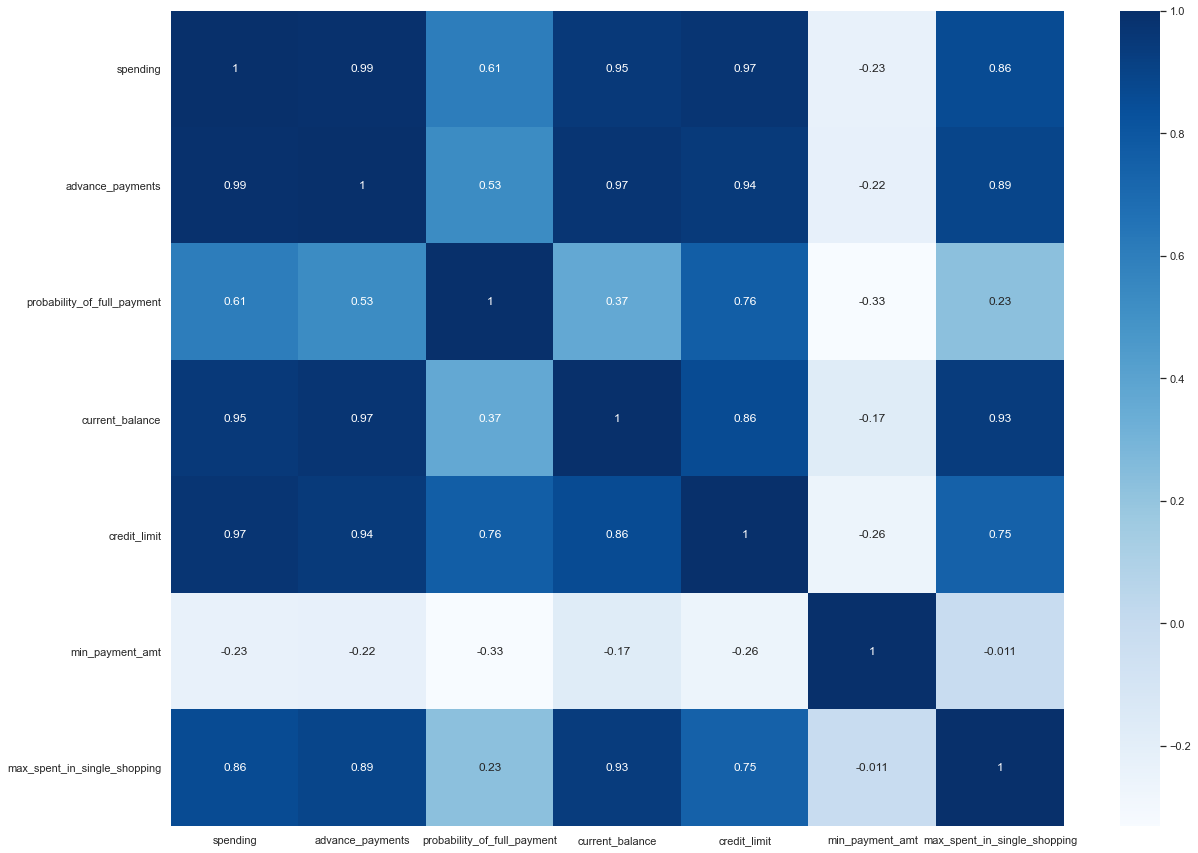

In [43]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap='Blues')

In [ ]:
Multivariate

In [ ]:
SCALING USING ZSCORE

In [45]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

[]
['spending', 'advance_payments', 'probability_of_full_payment', 'current_balance', 'credit_limit', 'min_payment_amt', 'max_spent_in_single_shopping']


In [47]:
## Using Zscore for scaling/standardisation
from scipy.stats import zscore
data_scaled=df[num].apply(zscore)

In [48]:
data_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [49]:
data_scaled.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.260896e-15,-1.358702e-16,-2.790757e-16,5.418946e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


In [55]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_df = X.fit_transform(df)
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [ ]:
Now that we have scaled the data. Let us create a dataframe out of this scaled variables for clustering.

In [56]:
scaled_df = pd.DataFrame(scaled_df, index=df.index, columns=df.columns)
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [ ]:
Perform Hierarchical Clustering with the Ward's linkage method and plot the dendrogram.

In [57]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [58]:
HClust = linkage(scaled_df, method = 'ward')

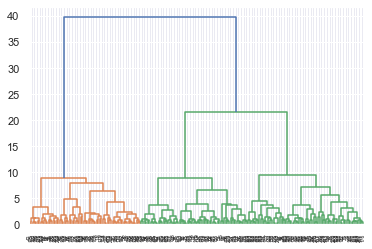

In [59]:
dend = dendrogram(HClust)

In [ ]:
Plot the truncated dendrogram with the last 25 clusters.

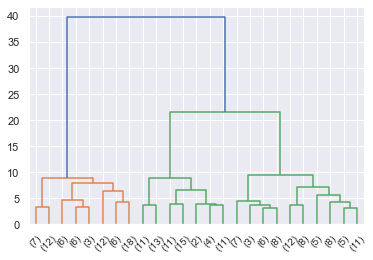

In [60]:
dend = dendrogram(HClust,
                 truncate_mode='lastp',
                 p = 25,# we are looking at the last 25 merges
                 )

In [ ]:
Identify the number of clusters based on the dendrogram and add the cluster numbers to the original dataframe.

In [62]:
from scipy.cluster.hierarchy import fcluster

In [63]:
#Method 1

clusters_1 = fcluster(HClust, 2, criterion='maxclust')
clusters_1


array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [64]:
# Method 2

clusters_2 = fcluster(HClust, 60, criterion='distance')
clusters_2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
kmeans

In [66]:
from sklearn.cluster import KMeans 

In [67]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2,random_state=1)

In [68]:
# Fit K means on the scaled_df
k_means.fit(scaled_df)


KMeans(n_clusters=2, random_state=1)

In [69]:
Cluster Output for all the observations

SyntaxError: invalid syntax (<ipython-input-69-e161dd035cb2>, line 1)

In [70]:
# Get the labels
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [ ]:
Within Cluster Sum of Squares

In [71]:
k_means.inertia_

659.171754487041

In [72]:
Forming clusters with K = 1,3,4,5,6 and comparing the WSS

SyntaxError: invalid syntax (<ipython-input-72-66c564b06824>, line 1)

In [73]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

1469.9999999999998

In [74]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

430.6589731513006

In [75]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

371.38509060801096

In [76]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

327.21278165661346

In [77]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

289.31599538959495

In [ ]:
WSS reduces as K keeps increasing

In [ ]:
Calculating WSS for other values of K - Elbow Method

In [78]:
wss =[] 

In [79]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [80]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.38509060801096,
 327.21278165661346,
 289.31599538959495,
 262.98186570162267,
 241.81894656086033,
 223.91254221002725,
 206.39612184786694]

In [81]:
a=[1,2,3,4,5,6,7,8,9,10]

C:\Users\Mishika Raj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

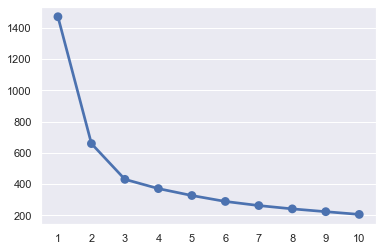

In [82]:
sns.pointplot(a, wss)

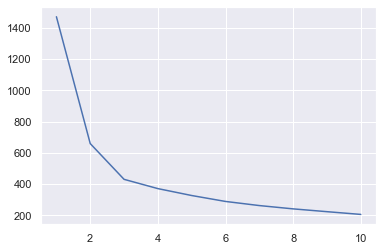

In [83]:
plt.plot(range(1,11), wss)

In [ ]:
KMeans with K=3

In [84]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [85]:
Cluster evaluation for 3 clusters: the silhouette score

SyntaxError: invalid syntax (<ipython-input-85-6f7f6aedb6f7>, line 1)

In [86]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [87]:
# Calculating silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.4007270552751299

In [ ]:
KMeans with K=4

In [88]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [89]:
silhouette_score(scaled_df,labels,random_state=1)

0.3276547677266193

In [ ]:
silhouette score is better for 3 clusters than for 4 clusters. So, final clusters will be 3

In [ ]:
Appending Clusters to the original dataset

In [101]:
df["Clus_kmeans4"] = labels
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans4,Clus_kmeans3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,3,3
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,1,1
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,3,3
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,3,3


In [106]:
Cluster Profiling

SyntaxError: invalid syntax (<ipython-input-106-2f51ed1b3d62>, line 1)

In [110]:
df.Clus_kmeans4.value_counts().sort_index()

0    65
1    66
2    30
3    49
Name: Clus_kmeans4, dtype: int64

In [119]:
clust_profile=df.drop(['bank_marketing_part1_Data'],axis=1)
clust_profile=clust_profile.groupby('Clus_kmeans4').mean()
clust_profile['freq']=df.Clus_kmeans4.value_counts().sort_index()
clust_profile

KeyError: "['bank_marketing_part1_Data'] not found in axis"